# Configurações iniciais para a definição dos modelos 

In [ ]:
# Importando as bibliotecas necessárias à manipulação do banco de dados.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
final_table = pd.read_excel('/content/drive/MyDrive/database/database.xlsx')

#3.0 Definição dos modelos e avaliação


In [ ]:
# Instalando um visualizador de grafo para imprimir a árvore de decisão gerada.
!pip install graphviz
import graphviz
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import pydot

# Instalando o sklearn
!pip install -U scikit-learn

# Importando 'clear_output'
from IPython.display import clear_output

# Importando todas as bibliotecas necessárias a modelagem corrente.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Importando a biblioteca para a árvore de decisão
from sklearn.tree import DecisionTreeClassifier

# Importando a biblioteca para o SVC
from sklearn.svm import SVC

# Importando a biblioteca para a rede neural
from sklearn.neural_network import MLPClassifier

# Importando todas as bibliotecas necessárias à avaliação corrente.
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

# Limpando o console de saída.
clear_output()

## 3.2 Árvore de Decisão


### 3.2.1 Árvore de Decisão - Construíndo um modelo sem os melhores parametros possíveis (Sem RandomSearch) e mostrando os resultados obtidos:

In [ ]:
# Criando um dataframe com somente os dados de entrada.
x = final_table.loc[:, final_table.columns!='overall_survive']

# Criando um dataframe com somente o atributo alvo.
y = final_table.loc[:, final_table.columns=='overall_survive']

# Dividindo os dados entre treino e teste e definindo o tamanho dos dados de teste como 30%.
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)

# Instanciando o modelo.
model_no_tuning = DecisionTreeClassifier()

# Treinando o modelo de busca
model_no_tuning.fit(x_train, y_train)

# Associando resultado.
y_pred_no_tuning = model_no_tuning.predict(x_test)

Análise dos resultados:

Acurácia: 67.12%
Precisão: 68.01%
Erro Quadrático: 47.38%
Recall: 64.86%
Segue a Matriz de Confusão: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


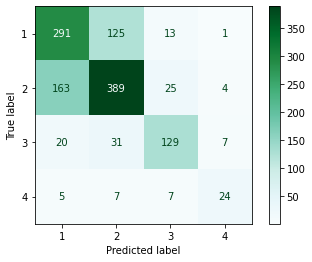

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred_no_tuning) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred_no_tuning, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test, y_pred_no_tuning) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred_no_tuning, average='macro') * 100))

# Plotando a matriz de confusão.
print("Segue a Matriz de Confusão: ")
_ = plot_confusion_matrix(model_no_tuning, x_test, y_test, cmap='BuGn')

### 3.2.2 Árvore de Decisão - Construíndo um modelo com os melhores parametros possiveis (Com RandomSearch) e mostrando os resultados obtidos:

In [ ]:
# Definindo os parâmetros para o randomSearch
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(1,10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': range(1,50)
}

# Instanciando o modelo.
modelDT = DecisionTreeClassifier()

# Instanciando o modelo de busca 
searchDT = RandomizedSearchCV(
    estimator = modelDT,
    param_distributions = params
)

# Treinando o modelo de busca
modelTraining = searchDT.fit(x_train, y_train)

# Associando resultado.
y_pred = modelTraining.predict(x_test)

# Limpando o console de saída.
clear_output()

# Mostrando os melhores parâmetros
modelTraining.best_params_

{'random_state': 22,
 'max_features': 'sqrt',
 'max_depth': 8,
 'criterion': 'gini'}

Análise dos resultados obtidos:

Acurácia: 65.43%
Precisão: 56.26%
Erro Quadrático: 49.15%
Recall: 49.58%
Segue a Matriz de Confusão: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


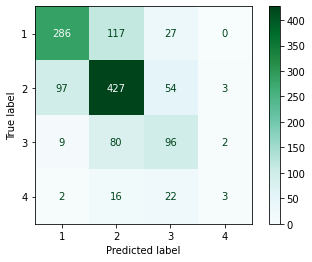

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test, y_pred, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test, y_pred) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred, average='macro') * 100))

# Plotando a matriz de confusão.
print("Segue a Matriz de Confusão: ")
_ = plot_confusion_matrix(modelTraining, x_test, y_test, cmap='BuGn')


### 3.2.3 Análise da relevancia das features para o modelo:

In [ ]:
def get_relevance(table, model):

  # Instanciando uma lista para armazenar os itens de maior relevância.
  relevance_list = []

  # Adicionando cada item à lista instanciada.
  for feature, importance in zip(final_table.columns, model.best_estimator_.feature_importances_):
    relevance_list.append({'feature': feature, 'importance':importance*100})

  # Ordenando a lista criada de maneira decrescente.
  sorted_relevance_list = sorted(relevance_list, key=lambda d: d['importance'], reverse=True) 

  # Imprimindo na tela as features mais relevantes em ordem de importancia.
  for i in sorted_relevance_list:
    print('{}: {:.2f}%'.format(i.get('feature'), i.get('importance')))

# Recebendo a relevância de cada feature.
get_relevance(final_table, modelTraining)

time_with_tumor_delta: 57.90%
is_benign: 7.66%
histological_grade_based_on_nottinghan: 5.28%
tumor_subtype: 4.55%
age_when_cancer_was_discovered_in_months: 4.23%
ricidive_status: 3.16%
breastfed_time: 2.72%
alcohol: 2.44%
body_mass_index: 2.04%
mitotic_index: 1.53%
has_breastfed: 1.44%
primary_diagnostic: 1.38%
menopause_status: 1.20%
has_children: 1.05%
menarche_age: 0.66%
progesteron_percentage: 0.65%
tubular_differentiation: 0.56%
histological_grade: 0.56%
tobaco: 0.41%
has_breast_cancer_family_history: 0.40%
abortion: 0.17%
number_of_births: 0.00%
hormone_therapy_status: 0.00%
hormone_therapy_time: 0.00%


### 3.2.4 Visualizando a árvore de decisão criada

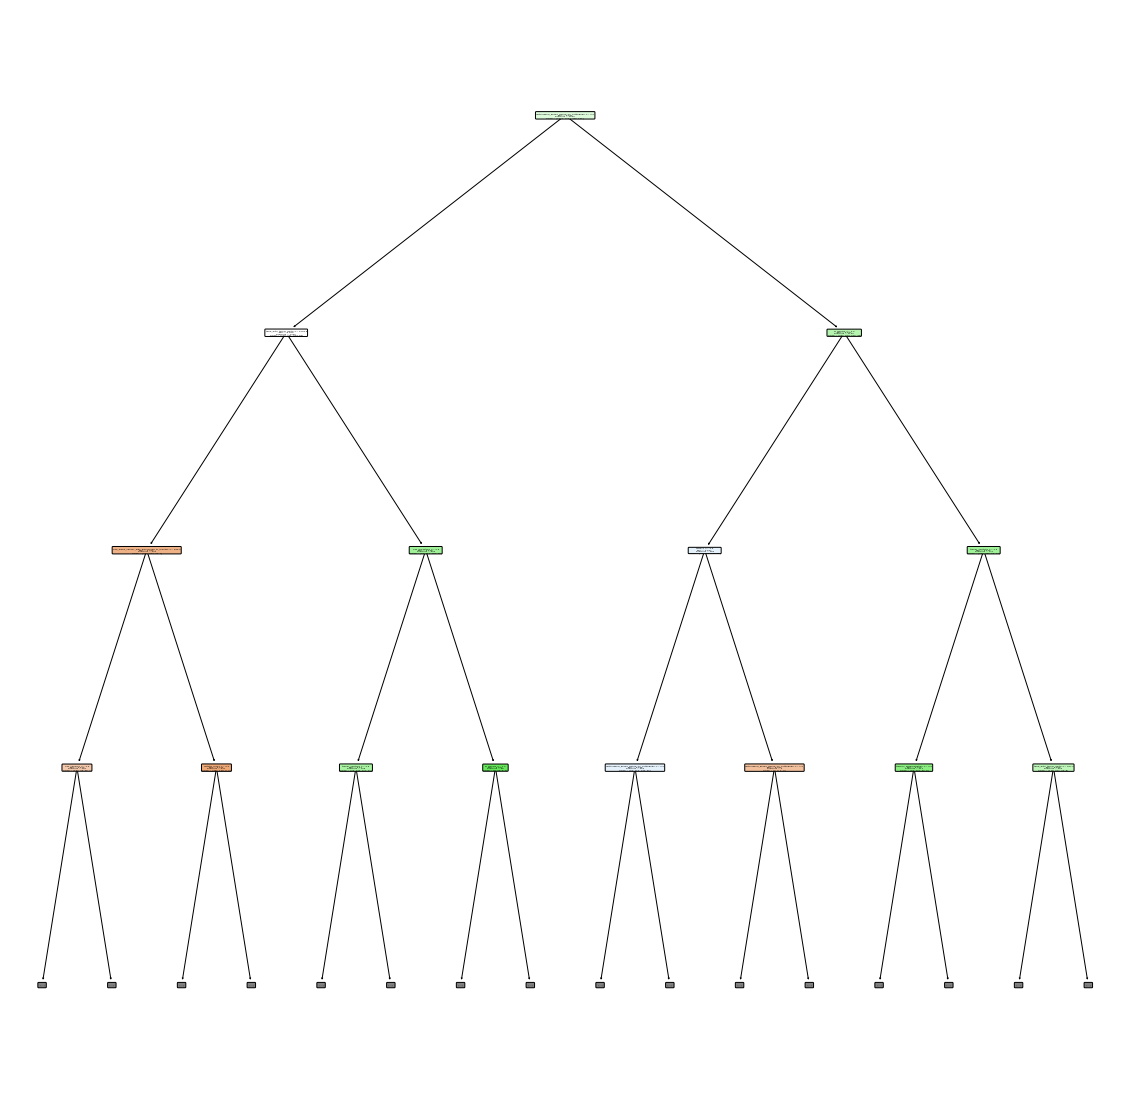

In [ ]:
# Ajustando aas configurações da figura.
fig, ax = plt.subplots(figsize=(20, 20))

# Gerando a imagem.
_ = plot_tree(modelTraining.best_estimator_, 
            feature_names=x.columns,
            class_names=None, 
            filled=True, rounded=True, ax=ax,
            max_depth = 3)

# Salvando a figura gerada.
fig.savefig('output.pdf')

## 3.3 Redes Neurais

### 3.3.1 Separando as tabelas para treino

In [ ]:
# Criando um dataframe com somente os dados de entrada.
x_neural_network = final_table.loc[:, final_table.columns!='overall_survive']

# Criando um dataframe com somente o atributo alvo.
y_neural_network = final_table.loc[:, final_table.columns=='overall_survive']

###3.3.2 Redes Neurais - Construíndo um modelo sem os melhores parametros possíveis (Sem RandomSearch) e mostrando os resultados obtidos:

In [ ]:
# Dividindo os dados entre treino e teste e definindo o tamanho dos dados de teste como 30%.
x_train_NN, x_test_NN, y_train_NN, y_test_NN = train_test_split(x_neural_network, y_neural_network, test_size=0.3, random_state=52)

# Instanciando o modelo.
NN = MLPClassifier()

# Treinando o modelo de busca
NN_model = NN.fit(x_train_NN, y_train_NN)

# Associando resultado.
y_pred_NN_no_tuning = NN_model.predict(x_test_NN)

# Limpando o console de saída.
clear_output()

Análise dos resultados obtidos:

Acurácia: 67.12%
Precisão: 50.09%
Erro Quadrático: 41.74%
Recall: 51.63%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


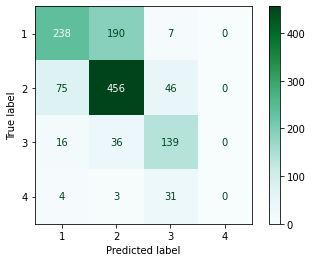

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_NN, y_pred_NN_no_tuning) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test_NN, y_pred_NN_no_tuning, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test_NN, y_pred_NN_no_tuning) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test_NN, y_pred_NN_no_tuning, average='macro') * 100))

# Matirz de Confusão do modelo
NNMatrix = plot_confusion_matrix(NN_model, x_test_NN, y_test_NN, cmap='BuGn')

###3.3.3 Rede Neural - Construíndo um modelo com os melhores parametros possíveis (Com RandomSearch) e mostrando os resultados obtidos:

In [ ]:
# Colocando parâmetros
params = {
   ## "hidden_layer_sizes": range(100, 800, 150),
    ##'max_iter': range(100, 1000, 100),
    'solver': ['lbfgs'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'] }

# Instanciando o modelo de busca 
search = RandomizedSearchCV(
    estimator = NN,
    param_distributions = params
)

# Treinando o modelo de busca
NN_model1 = search.fit(x_train_NN, y_train_NN)

# Associando resultado.
y_pred_NN = NN_model1.predict(x_test_NN)

# Limpando o console de saída.
clear_output()

Análise dos resultados obtidos:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Acurácia: 52.30%
Precisão: 30.94%
Erro Quadrático: 108.62%
Recall: 35.07%


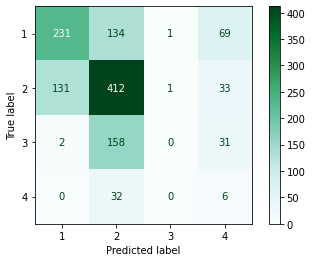

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_NN, y_pred_NN) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test_NN, y_pred_NN, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test_NN, y_pred_NN) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test_NN, y_pred_NN, average='macro') * 100))

# Matirz de Confusão do modelo
NNMatrix = plot_confusion_matrix(NN_model1, x_test_NN, y_test_NN, cmap='BuGn')

##3.4 SVM

###3.4.1 SVM - Construíndo um modelo sem os melhores parametros possíveis (Sem RandomSearch) e mostrando os resultados obtidos:

In [ ]:
# Criando um dataframe com somente os dados de entrada.
x_SVC = final_table.loc[:, final_table.columns!='overall_survive']

# Criando um dataframe com somente o atributo alvo.
y_SVC = final_table.loc[:, final_table.columns=='overall_survive']

# Dividindo os dados entre treino e teste e definindo o tamanho dos dados de teste como 30%.
x_train_SVC, x_test_SVC, y_train_SVC, y_test_SVC = train_test_split(x_SVC, y_SVC, test_size=0.3, random_state=42)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf.fit(x_train_SVC, y_train_SVC)

y_pred_SVC_no_tuning = clf.predict(x_test_SVC)

# Limpando o console de saída.
clear_output()

Análise dos resultados obtidos:

Acurácia: 70.27%
Precisão: 59.18%
Erro Quadrático: 43.59%
Recall: 55.10%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


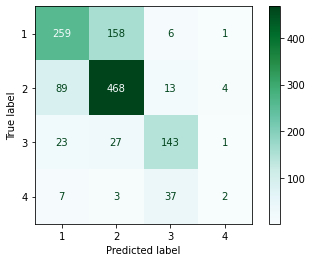

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_SVC, y_pred_SVC_no_tuning) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test_SVC, y_pred_SVC_no_tuning, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test_SVC, y_pred_SVC_no_tuning) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test_SVC, y_pred_SVC_no_tuning, average='macro') * 100))

SVM_Matrix = plot_confusion_matrix(clf, x_test_SVC, y_test_SVC, cmap='BuGn')

###3.4.2 SVM - Construíndo um modelo com os melhores parametros possíveis (Com RandomSearch) e mostrando os resultados obtidos:

In [ ]:
##print(clf.get_params())
params = {    'svc__C': [0.1, 1, 10, 100, 1000], 
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__random_state': [None, 0, 42],
              'svc__probability': [True, False],
              'svc__kernel': ['linear', 'rbf', 'poly']} 

# Instanciando o modelo de busca 
search = RandomizedSearchCV(
    estimator = clf,
    param_distributions = params
)

SVM_model = search.fit(x_train_SVC, y_train_SVC)

y_pred_SVC = SVM_model.predict(x_test_SVC)


# Limpando o console de saída.
clear_output()

Análise dos resultados obtidos:

Acurácia: 68.41%
Precisão: 50.97%
Erro Quadrático: 44.08%
Recall: 53.18%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


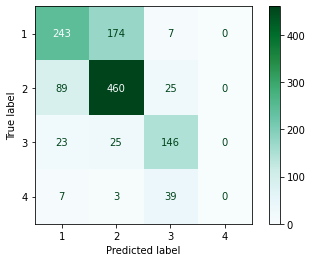

In [ ]:
  # Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_SVC, y_pred_SVC) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test_SVC, y_pred_SVC, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test_SVC, y_pred_SVC) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test_SVC, y_pred_SVC, average='macro') * 100))

SVM_Matrix = plot_confusion_matrix(SVM_model, x_test_SVC, y_test_SVC, cmap='BuGn')

## 3.5 Comparando o desempenho dos modelos

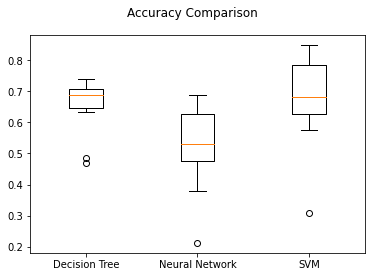

In [ ]:
from sklearn import model_selection

models = [('Decision Tree', modelTraining.best_estimator_), ('Neural Network', NN_model1.best_estimator_), ('SVM', SVM_model.best_estimator_)]

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

clear_output()

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 3.5.1 Acurácia obtida entre os modelos

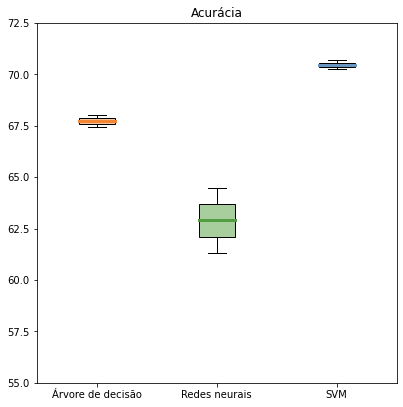

In [ ]:
# Creating dataset
np.random.seed(10)
 
# BinaryTree
data_1 = [67.45, 68.01]

# Neural Network
data_2 = [64.46, 61.32]

# SVM
data_3 = [70.27, 70.67]

data = [data_1,data_2,data_3]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#f7c29a', '#a8ce9e',
          '#9cbad7', '#e29c98']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Árvore de decisão','Redes neurais','SVM'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#f08636',linewidth = 3)

bp['medians'][1].set(color ='#529d3f',linewidth = 3)

bp['medians'][2].set(color ='#6896c1',linewidth = 3)     

plt.title("Acurácia")

plt.yticks(np.arange(55, 75, 2.5))
 
# Showing plot
plt.show()

### 3.5.2 Precisão encontrada entre modelos

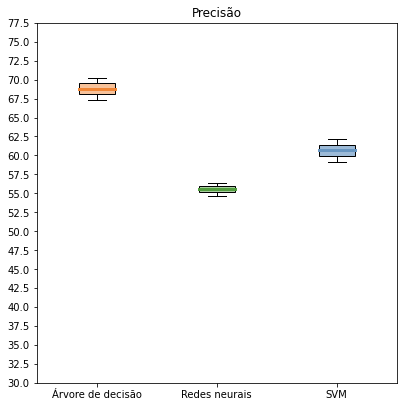

In [ ]:
# Creating dataset
np.random.seed(10)
 
# BinaryTree
data_1 = [70.25, 67.32]

# Neural Network
data_2 = [56.36,54.70]

# SVM
data_3 = [59.18, 62.14]

data = [data_1,data_2,data_3]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#f7c29a', '#a8ce9e',
          '#9cbad7', '#e29c98']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Árvore de decisão','Redes neurais','SVM'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#f08636',linewidth = 3)

bp['medians'][1].set(color ='#529d3f',linewidth = 3)

bp['medians'][2].set(color ='#6896c1',linewidth = 3)
     
plt.title("Precisão")

plt.yticks(np.arange(30, 80, 2.5))
 
# Showing plot
plt.show()

### 3.5.3 Erro quadrático apresentado pelos modelos

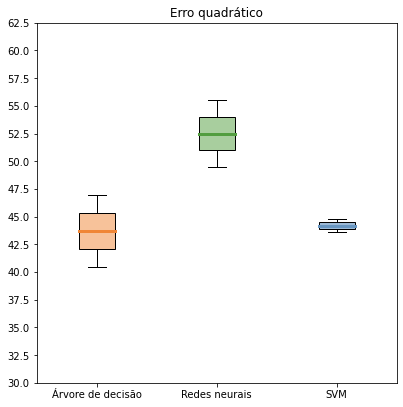

In [ ]:
# Creating dataset
np.random.seed(10)
 
# BinaryTree
data_1 = [46.98, 40.45]

# Neural Network
data_2 = [49.48, 55.52] 

# SVM
data_3 = [43.59, 44.80]

data = [data_1,data_2,data_3]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#f7c29a', '#a8ce9e',
          '#9cbad7', '#e29c98']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Árvore de decisão','Redes neurais','SVM'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#f08636',linewidth = 3)

bp['medians'][1].set(color ='#529d3f',linewidth = 3)

bp['medians'][2].set(color ='#6896c1',linewidth = 3)     

plt.title("Erro quadrático")

plt.yticks(np.arange(30, 65, 2.5))
 
# Showing plot
plt.show()

### 3.5.4 Recall

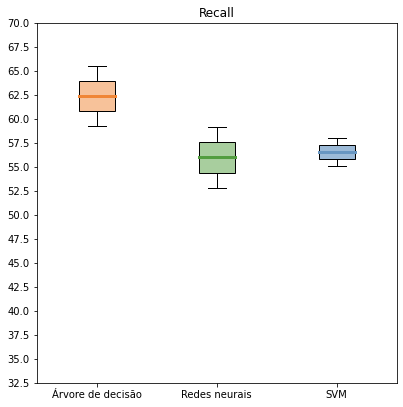

In [ ]:
# Creating dataset
np.random.seed(10)
 
# BinaryTree
data_1 = [65.47, 59.20]

# Neural Network
data_2 = [59.12, 52.83]

# SVM
data_3 = [55.10, 58.00]

data = [data_1,data_2,data_3]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#f7c29a', '#a8ce9e',
          '#9cbad7', '#e29c98']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Árvore de decisão','Redes neurais','SVM'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#f08636',linewidth = 3)

bp['medians'][1].set(color ='#529d3f',linewidth = 3)

bp['medians'][2].set(color ='#6896c1',linewidth = 3)     

plt.title("Recall")

plt.yticks(np.arange(32.5, 72.5, 2.5))
 
# Showing plot
plt.show()

### 3.5.5 Valores obtidos com a Árvore de Decisão

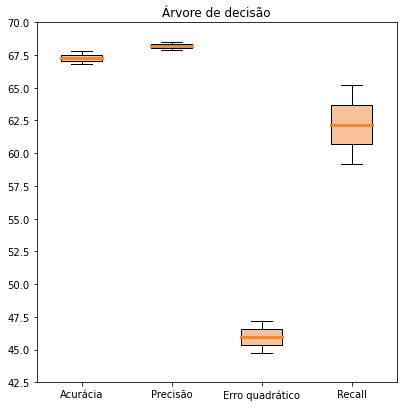

In [ ]:
# Creating dataset
np.random.seed(10)
 
# Acurácia
data_1 = [66.80, 67.77]

# Precisão
data_2 = [68.46, 67.87]

# Erro quadrático
data_3 = [47.22, 44.72] # faltam dados aqui

# Recall
data_4 = [65.21, 59.16]

data = [data_1,data_2,data_3,data_4]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#f7c29a', '#f7c29a',
          '#f7c29a', '#f7c29a']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Acurácia','Precisão','Erro quadrático','Recall'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#f08636',linewidth = 3)

bp['medians'][1].set(color ='#f08636',linewidth = 3)

bp['medians'][2].set(color ='#f08636',linewidth = 3)

bp['medians'][3].set(color ='#f08636',linewidth = 3)
     

plt.title("Árvore de decisão")

plt.yticks(np.arange(42.5, 72.5, 2.5))
 
# Showing plot
plt.show()

### 3.5.6 Valores obtidos com as Redes Neurais

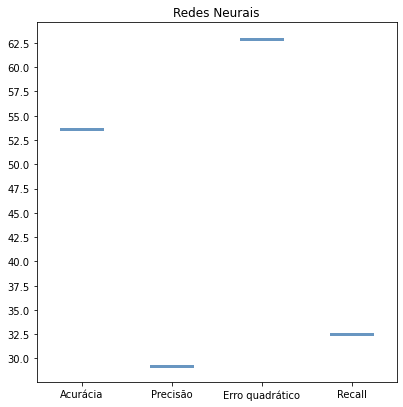

In [ ]:
# Creating dataset
np.random.seed(10)
 
# Acurácia
data_1 = [53.67] # faltam dados aqui

# Precisão
data_2 = [29.23] # faltam dados aqui

# Erro quadrático
data_3 = [62.93] # faltam dados aqui

# Recall
data_4 = [32.54] # faltam dados aqui

data = [data_1,data_2,data_3,data_4]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#9cbad7', '#9cbad7',
          '#9cbad7', '#9cbad7']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Acurácia','Precisão','Erro quadrático','Recall'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#6896c1',linewidth = 3)

bp['medians'][1].set(color ='#6896c1',linewidth = 3)

bp['medians'][2].set(color ='#6896c1',linewidth = 3)

bp['medians'][3].set(color ='#6896c1',linewidth = 3)
     

plt.title("Redes Neurais")

plt.yticks(np.arange(30, 65, 2.5))
 
# Showing plot
plt.show()

### 3.5.7 Valores obtidos com o SVM

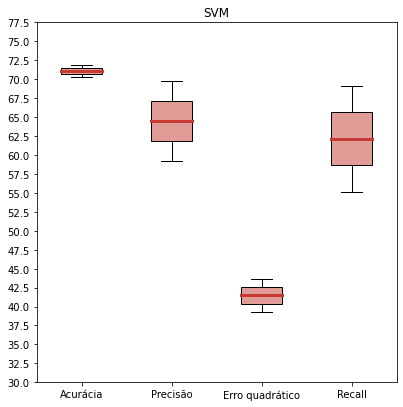

In [ ]:
# Creating dataset
np.random.seed(10)
 
# Acurácia
data_1 = [71.88, 70.27] 

# Precisão
data_2 = [69.74, 59.18]   

# Erro quadrático
data_3 = [39.32, 43.59] 

# Recall
data_4 = [69.15, 55.10] 

data = [data_1,data_2,data_3,data_4]
 
fig = plt.figure(figsize=(5, 5))

colors = ['#e29c98', '#e29c98',
          '#e29c98', '#e29c98']
 
# Creating axes instance
ax = fig.add_axes([1,1,1,1])

ax.set_xticklabels(['Acurácia','Precisão','Erro quadrático','Recall'])
 
# Creating plot
bp = ax.boxplot(data, patch_artist = True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

bp['medians'][0].set(color ='#c63a33',linewidth = 3)

bp['medians'][1].set(color ='#c63a33',linewidth = 3)

bp['medians'][2].set(color ='#c63a33',linewidth = 3)

bp['medians'][3].set(color ='#c63a33',linewidth = 3)
     

plt.title("SVM")

plt.yticks(np.arange(30, 80, 2.5))
 
# Showing plot
plt.show()